<a href="https://colab.research.google.com/github/billiahkerubo1/MchezoPesa-Football-Predictions/blob/main/Mchezopesa_ltd_DataAnalysis_Week6_IP_by_BilliahKeruboMenyenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ANALYSIS ON MCHESOPESA LIMITED***

# 1.0 Defining the question.

Mchezopesa limited is a company that involves football games. As a data analyst, I have access to football information including the team names and scores and predict the number of goals in the future matches.

1.1.1 Specifying the question
The number of goals that can be scored given rank and tournament

# 1.1 Defining the metrics of success


The metrics of success entails using various methods of predictions and evaluating the best using the accuracy score.

# 1.3 Understanding the context

This is a football analysis that depends on evaluating and understanding the variables such as the team name and score as well as the tournament type.

# 1.4  Recording the Experimental Design


1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5.Challenging the solution

# 1.5 Important libraries

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


# 1.6 Loading datasets

In [2]:
#loading the datasets
data = pd.read_csv('/content/results.csv', parse_dates=['date'])


In [3]:
ranking =pd.read_csv('/content/fifa_ranking.csv',parse_dates=['rank_date'])
ranking.head(20)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


# 1.7 Understanding the data

In [4]:
ranking.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [5]:
#checking the size of the dataset
data.shape,ranking.shape

((40839, 9), (57793, 16))

The data has 40839 rows and 9 columns, while ranking has 57793 rows and 16 columns

In [6]:
#previewing the first records
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#previewing the last records
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
#getting information on our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [9]:
#checking the columns
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [10]:
#checking for unique values
data.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

# 1.8 Data Cleaning

In [11]:
#checking for null values
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The dataset has no null values

In [12]:
#checking for duplicate values
data.duplicated().sum()

0

The data has no duplicated values

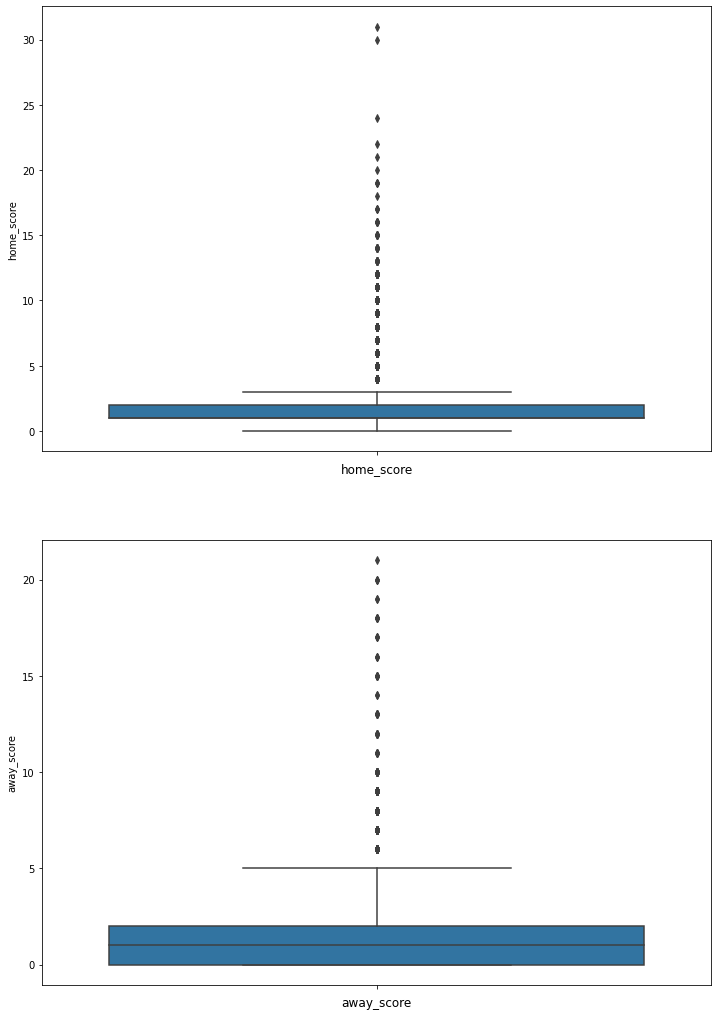

In [13]:
#checking for outliers
 
numerical_columns = ['home_score','away_score']
fig, ax = plt.subplots(len(numerical_columns), figsize=(12,18))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12);

plt.show();

The data has outliers but ww will not remove them because they are still informative to the analysis.

In [14]:
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
ranking.duplicated().sum()

37

We will remove the 37 duplicated values

In [16]:
#removing duplicates
ranking.drop_duplicates(inplace = True)

In [17]:
#checking if the duplicates have been dropped
ranking.duplicated().sum()

0

The duplicates have been dropped.

In [41]:
#renaming rank date to date
ranking = ranking.rename(columns={'rank_date':'date'})
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [42]:
fifa = pd.merge(data,ranking,on = 'date')
fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212793,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
212794,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
212795,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
212796,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF


In [43]:
#making a copy of the dataframe
fifa1 = fifa.copy()


In [44]:
fifa1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
212793,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
212794,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
212795,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
212796,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
212797,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC


In [46]:
#separating date to year, month and day
fifa1['date'] = pd. to_datetime(fifa1['date'],format='%Y%m%d')
fifa1['year'] = pd. DatetimeIndex(fifa1['date']). year
fifa1['month'] = pd. DatetimeIndex(fifa1['date']). month

In [47]:
fifa1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8


In [21]:
#checking the size of the merged dataframe
fifa1.shape

(212798, 25)

The dataset has 212798 rows and 25 columns

In [22]:
fifa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212798 entries, 0 to 212797
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     212798 non-null  datetime64[ns]
 1   home_team                212798 non-null  object        
 2   away_team                212798 non-null  object        
 3   home_score               212798 non-null  int64         
 4   away_score               212798 non-null  int64         
 5   tournament               212798 non-null  object        
 6   city                     212798 non-null  object        
 7   country                  212798 non-null  object        
 8   neutral                  212798 non-null  bool          
 9   rank                     212798 non-null  int64         
 10  country_full             212798 non-null  object        
 11  country_abrv             212798 non-null  object        
 12  total_points    

# 1.9 Exploratory Data Analysis

In [23]:
#checking descriptive summaries
fifa1.describe()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000
mean,1.682098,1.046951,101.864012,42.556582,341.234626,-0.009502,21.481468,21.481468,21.100183,10.550111,20.966169,6.289856,21.176083,4.235237
std,1.969885,1.257602,58.649297,163.890165,295.103291,4.537499,85.357707,85.357707,89.725337,44.862704,84.558722,25.367622,86.292406,17.258509
min,0.000000,0.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,51.000000,0.000000,71.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,102.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,152.000000,0.000000,531.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,209.000000,1770.060000,1920.000000,71.000000,1126.040000,1126.040000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [24]:
#finding the mean
fifa1[['home_score',	'away_score',	'rank',	'total_points',	'previous_points',	'rank_change',	'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted']].mean()

home_score                   1.682098
away_score                   1.046951
rank                       101.864012
total_points                42.556582
previous_points            341.234626
rank_change                 -0.009502
cur_year_avg                21.481468
cur_year_avg_weighted       21.481468
last_year_avg               21.100183
last_year_avg_weighted      10.550111
two_year_ago_avg            20.966169
two_year_ago_weighted        6.289856
three_year_ago_avg          21.176083
three_year_ago_weighted      4.235237
dtype: float64

In [25]:
 #Finding the standard deviation
 df_col = ['home_score',	'away_score',	'rank',	'total_points',	'previous_points',	'rank_change',	'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted']
for column in df_col:
  print('\n')
  print(column + ', Standard deviation: '+ str(fifa1[column].std()))
  print(column + ', Variance: '+ str(fifa1[column].var()))
  print(column + ', Skewness: '+ str(fifa1[column].skew()))
  print(column + ', Kurtosis: '+ str(fifa1[column].kurt()))



home_score, Standard deviation: 1.969884710310291
home_score, Variance: 3.880445771914259
home_score, Skewness: 4.806369995445173
home_score, Kurtosis: 52.3258363661097


away_score, Standard deviation: 1.2576021852547428
away_score, Variance: 1.5815632563575044
away_score, Skewness: 2.3593575996595035
away_score, Kurtosis: 10.871772952862266


rank, Standard deviation: 58.64929683105551
rank, Variance: 3439.740018777258
rank, Skewness: 0.008531080554441349
rank, Kurtosis: -1.1915836863067018


total_points, Standard deviation: 163.8901647057497
total_points, Variance: 26859.98608727776
total_points, Skewness: 4.826985041333102
total_points, Kurtosis: 25.987713098238107


previous_points, Standard deviation: 295.1032911706493
previous_points, Variance: 87085.95245974902
previous_points, Skewness: 1.035943356145554
previous_points, Kurtosis: 1.383723688179534


rank_change, Standard deviation: 4.537498603792577
rank_change, Variance: 20.588893579419583
rank_change, Skewness: 1.4200769

All columns are positively skewed with the frequent level of skewness being value of 5.

In [26]:
# Interquantile range

for column in df_col:
  print('\n')
  print(fifa1[column].quantile([0.25, 0.5, 0.75]))



0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


0.25     51.0
0.50    102.0
0.75    152.0
Name: rank, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: total_points, dtype: float64


0.25     71.0
0.50    297.0
0.75    531.0
Name: previous_points, dtype: float64


0.25   -1.0
0.50    0.0
0.75    1.0
Name: rank_change, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: cur_year_avg, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: cur_year_avg_weighted, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: last_year_avg, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: last_year_avg_weighted, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: two_year_ago_avg, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: two_year_ago_weighted, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: three_year_ago_avg, dtype: float64


0.25    

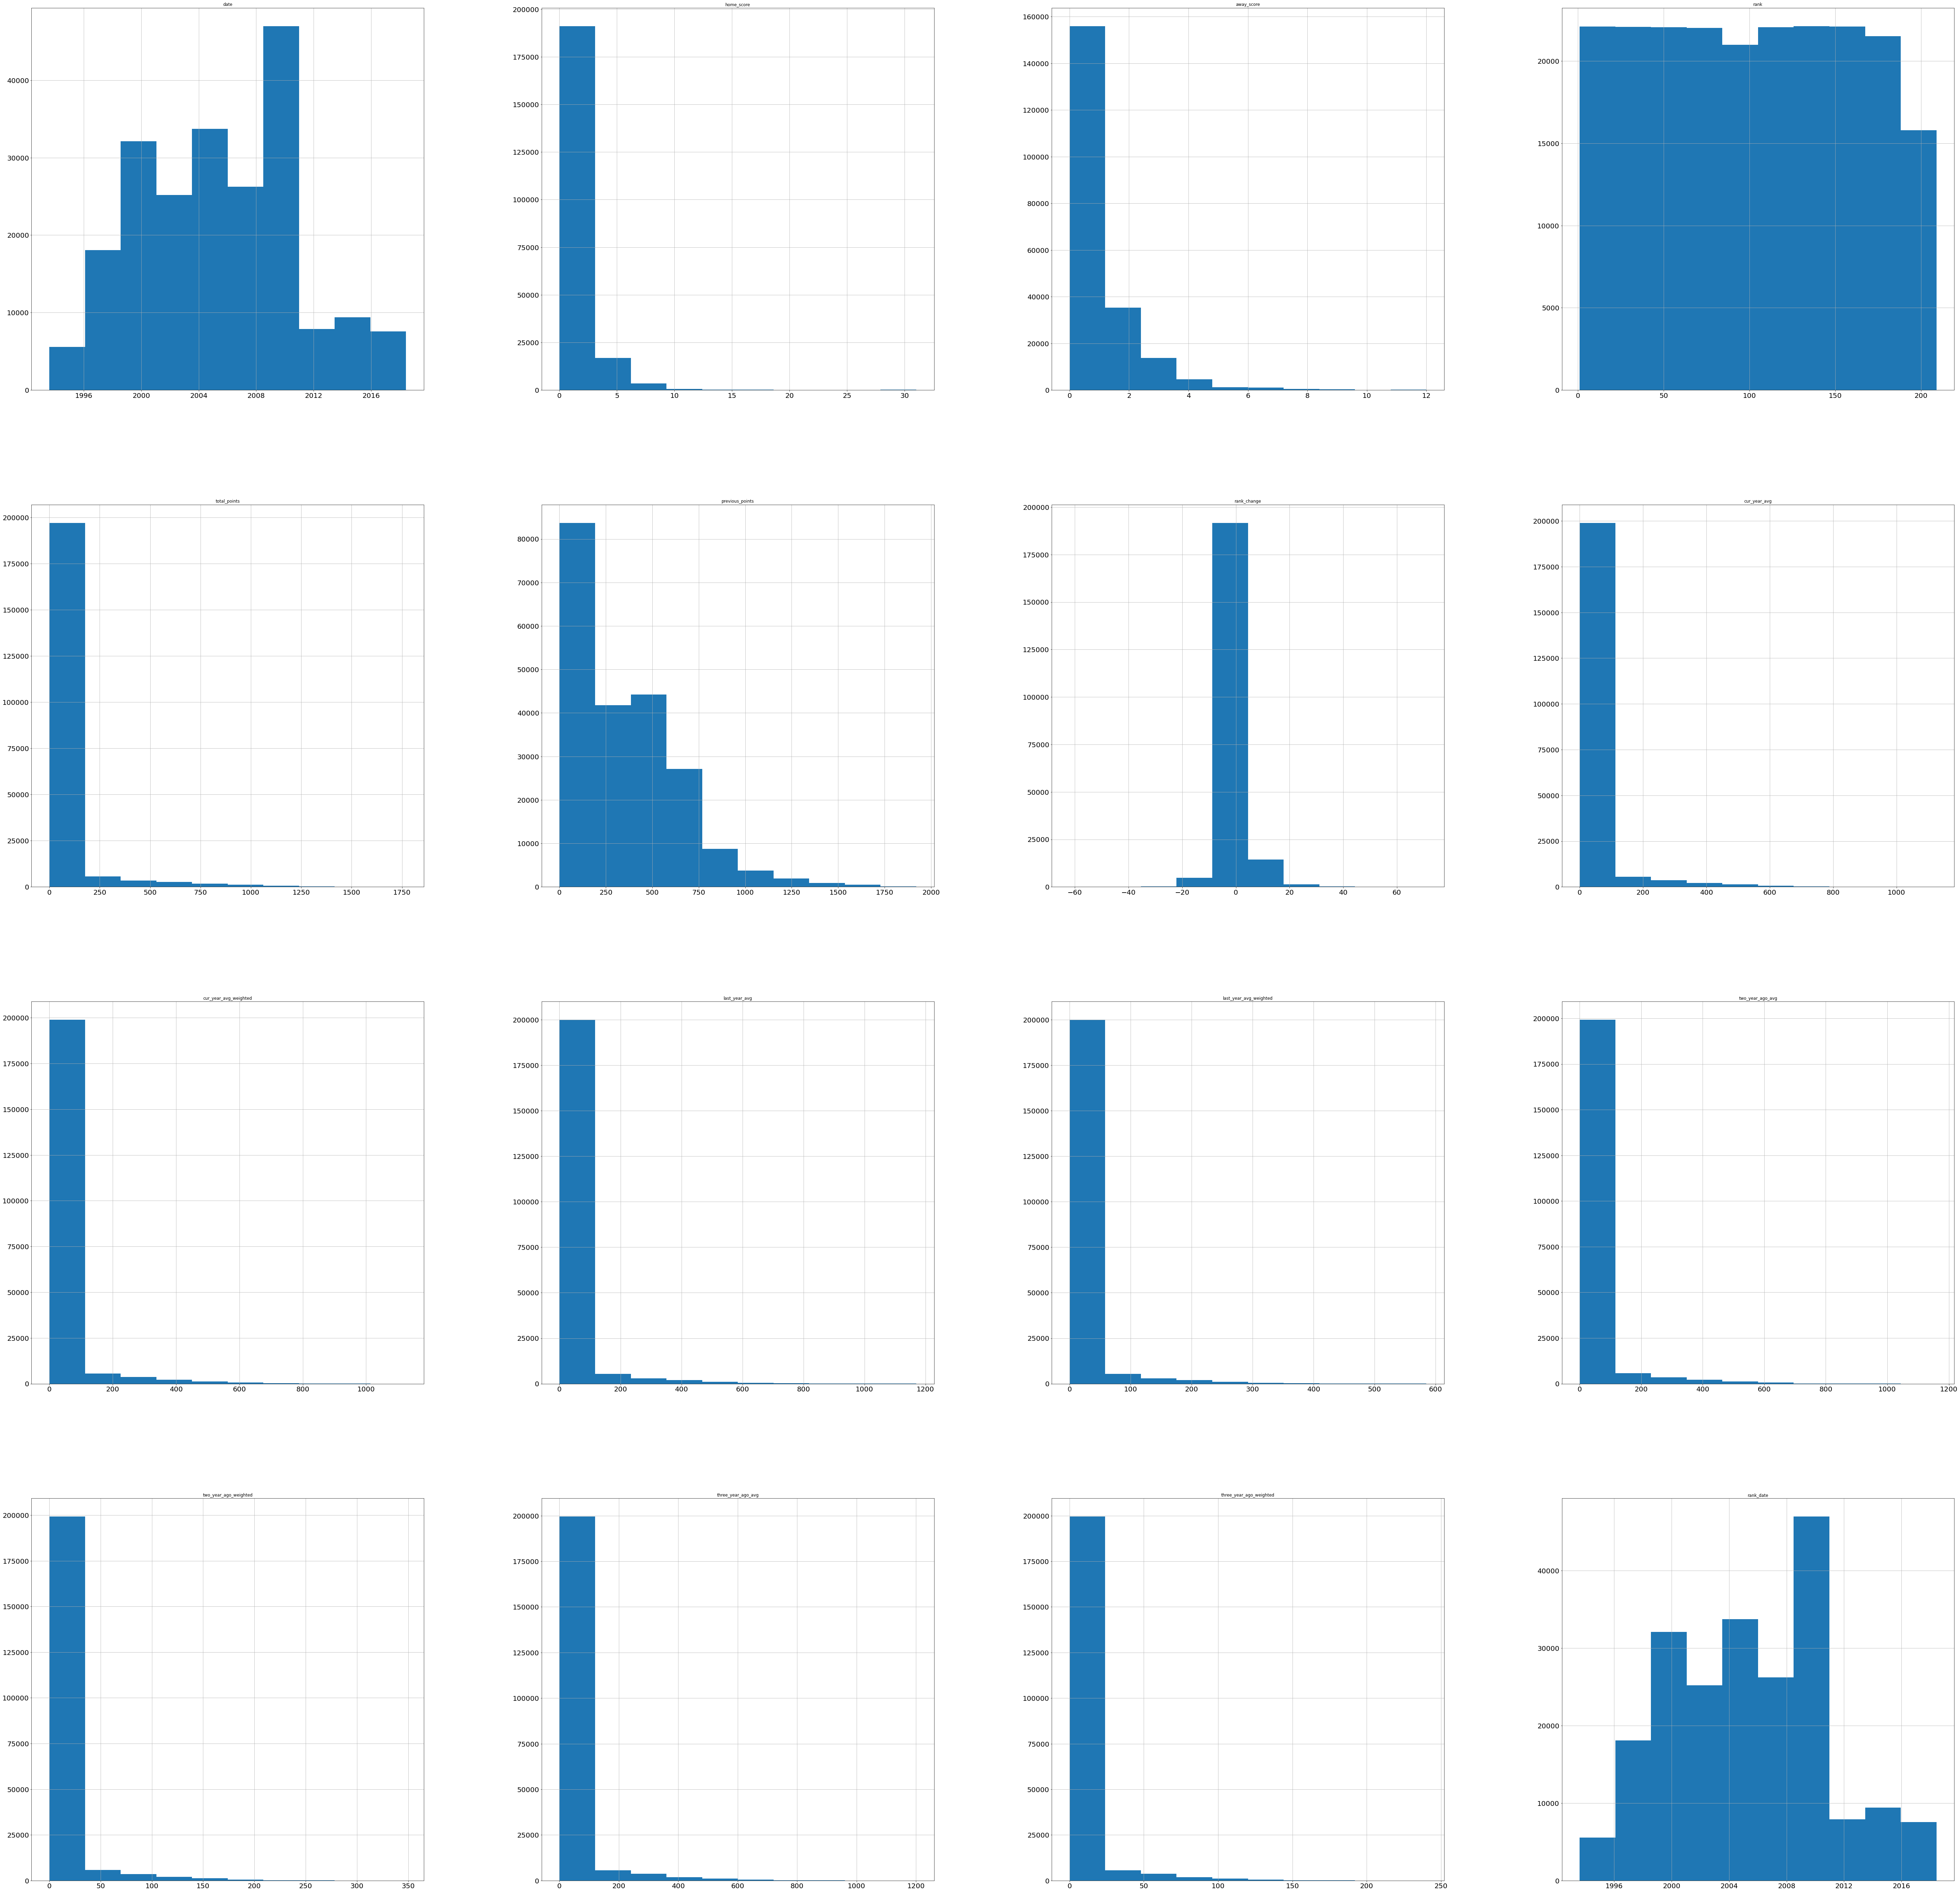

In [27]:
fifa1.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

The data is not normally distributed, as illustrated by the histograms.

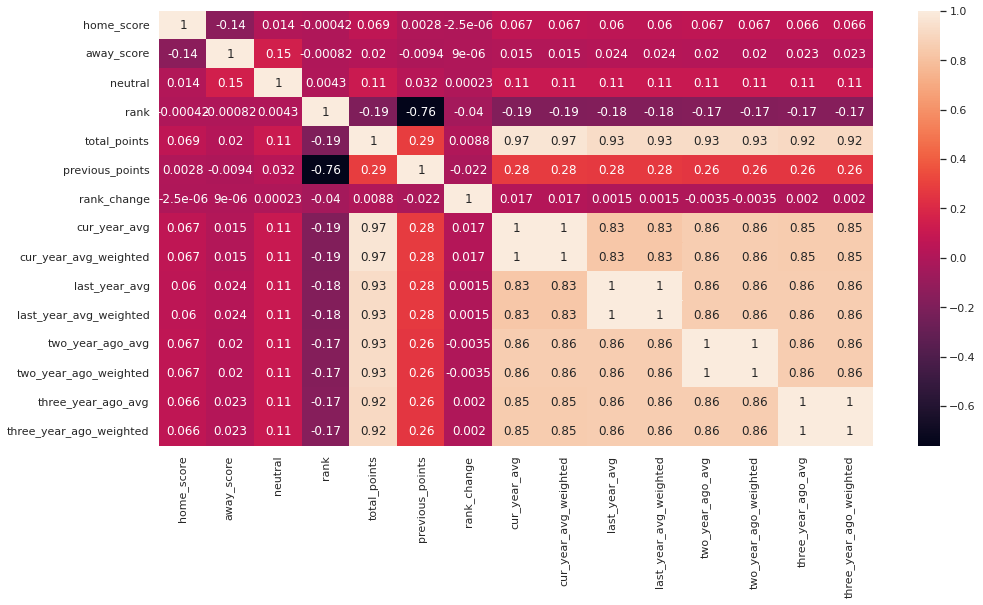

In [28]:
#correlation between variables on a heatmap
correlation = fifa1.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)


The previous points and rank are strongly negatively correlated. An increase in any of them by a unit results in a decrease of the other by 0.76.

Current year average,current year average weight and total points are strongly positively correlated by 0.97. 

Current year average and two year ago average are strongly positively correlated. Current year and three year ago average are also strongly correlated.

Three year ago average and total points are strongly positively correlated.

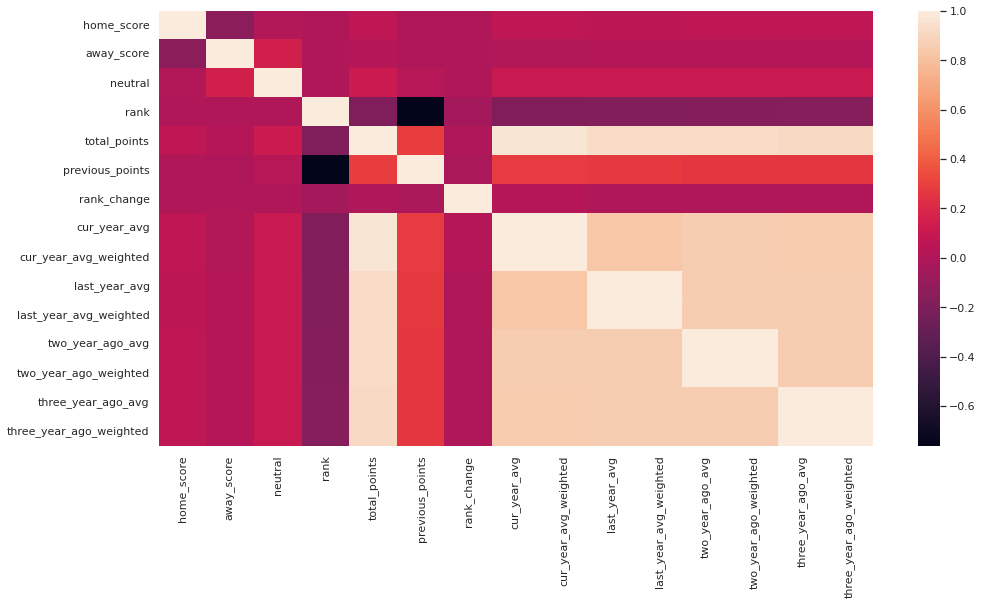

In [29]:
# Checking for independence between features
 
sns.heatmap(fifa1.corr())  

Rank and previous points are not independent. It is agood idea to drop them

In [30]:
# dropping  previous points 
fifa1.drop(['previous_points'],axis=1,inplace=True)
fifa1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [48]:
#dropping date column
fifa1.drop(['date'],axis=1,inplace=True)

In [50]:
#checking the winning team
fifa1['win'] = np.where(fifa1.home_score > fifa1.away_score, 'home_team', np.where(fifa1.away_score > fifa1.home_score, 'away_team', 'draw'))
fifa1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month,win
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8,home_team


In [64]:
#filtering
fifa1 = fifa1[fifa1['year'] >= 1993]
fifa1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month,win
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,home_team
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8,home_team


In [65]:
#checking  proportions of home and away
prop = (fifa1.win.value_counts(normalize = True) *100).round(2).reset_index()
prop.columns = ['win', '%']
prop

,win,%
0,home_team,48.82
1,away_team,26.35
2,draw,24.82


In [132]:
#win,lose,draw
fifa1['win'] = np.where(fifa1.win == 'home_team', 2, np.where(fifa1.win == 'away_team', 1, 0))

fifa1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month,win
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,2
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,2
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,2
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8,2
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8,2


The home team has more wins.

In [133]:
#getting records from the home team
home_df = fifa1[['home_team', 'tournament','home_score','rank','win']]
home_df.head()


,home_team,tournament,home_score,rank,win
0,Bolivia,FIFA World Cup qualification,3,1,2
1,Bolivia,FIFA World Cup qualification,3,2,2
2,Bolivia,FIFA World Cup qualification,3,3,2
3,Bolivia,FIFA World Cup qualification,3,4,2
4,Bolivia,FIFA World Cup qualification,3,5,2


In [134]:
#renaming rank column
home_df = home_df.rename(columns={'rank':'home_rank'})
home_df.head()

,home_team,tournament,home_score,home_rank,win
0,Bolivia,FIFA World Cup qualification,3,1,2
1,Bolivia,FIFA World Cup qualification,3,2,2
2,Bolivia,FIFA World Cup qualification,3,3,2
3,Bolivia,FIFA World Cup qualification,3,4,2
4,Bolivia,FIFA World Cup qualification,3,5,2


In [135]:
#record on the away team
away_df = fifa1[['away_team','tournament','away_score','rank','win']]
away_df.head()

,away_team,tournament,away_score,rank,win
0,Uruguay,FIFA World Cup qualification,1,1,2
1,Uruguay,FIFA World Cup qualification,1,2,2
2,Uruguay,FIFA World Cup qualification,1,3,2
3,Uruguay,FIFA World Cup qualification,1,4,2
4,Uruguay,FIFA World Cup qualification,1,5,2


In [136]:
#renaming rank column
away_df= away_df.rename(columns={'rank':'away_rank'})
away_df.head()

,away_team,tournament,away_score,away_rank,win
0,Uruguay,FIFA World Cup qualification,1,1,2
1,Uruguay,FIFA World Cup qualification,1,2,2
2,Uruguay,FIFA World Cup qualification,1,3,2
3,Uruguay,FIFA World Cup qualification,1,4,2
4,Uruguay,FIFA World Cup qualification,1,5,2


# 2.0 Polynomial Regression

In [137]:
# defining target variable and features
X = home_df[['home_rank']].values
y =home_df['home_score'].values


In [99]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = X_test.reshape(-1,1)
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression()

In [96]:
#Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression()

In [97]:
 # Predict using linear regression
lin_pred = reg_line.predict([[3]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
y_pred = pol_reg.predict(poly_reg.fit_transform([[3]]))
print('Polynomial prediction: %d' %y_pred)

Linear prediction: 1
Polynomial prediction: 1


In [85]:
#getting residuals
residuals = np.subtract(y_pred, y_test)
#describing residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0026794730551623577

In [87]:
# defining target variable and features
X = away_df[['away_rank']].values
y =away_df['away_score'].values

In [100]:
 #Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

#preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = X_test.reshape(-1,1)
X_test.reshape(-1,1)
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression()

In [101]:
#Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression()

In [104]:
# Predict using linear regression
lin_pred = reg_line.predict([[3]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
y_pred = pol_reg.predict(poly_reg.fit_transform([[3]]))
print('Polynomial prediction: %d' %y_pred)

Linear prediction: 1
Polynomial prediction: 1


In [117]:
from scipy.stats import bartlett

# Bartlett's test in Python with SciPy:
stat, p = bartlett(y_pred, residuals)

print(stat, p)

degree_of_freedom = len(y_pred)-1
probability = 1 - p

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(p)

nan nan
nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


# Conducting Cross-validation

In [120]:
from sklearn.model_selection import KFold

X = away_df[['away_rank']].values
y =away_df['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] #  keeping track of the RSME of each model
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

   
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.2804109787480005

Training model 2
Model 2 Root Mean Squared Error: 1.2335618859830626

Training model 3
Model 3 Root Mean Squared Error: 1.2660011398014888

Training model 4
Model 4 Root Mean Squared Error: 0.9847175367145937

Training model 5
Model 5 Root Mean Squared Error: 1.4745916510422838


The Root Mean Squared Error of model 4 is 0.98471. It is therefore recommendable o use 4 folds since there is minimal error.

In [121]:
np.mean(RMSES)

1.2478566384578857

The average mean is very large. It is good to use model 4, with minimal error.

# Approach 2

# *Logistic* *Regression*

In [140]:
# Splitting our dataset


X= home_df['home_score'].values.reshape(-1,1)
y = home_df['win'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [141]:
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [143]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [144]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix



array([[ 6844,  6305,  2830],
       [ 5343, 10236,  1176],
       [ 6710,     0, 24396]])

The number of correct predictions are on the main diagonal, while the rest are incorrect predictions. For instance in this case, the number of correct predictions are 6844,10236 and 24396. The rest of the numbers are incorrect predictions. 

**Hyperparameter** **Tuning**

In [145]:
#importing libraries
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [146]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression()

In [147]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [148]:
 #Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [150]:
 #Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [151]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [152]:
# Predicting target vector
best_model.predict(X)

array([2, 2, 2, ..., 2, 2, 2])

In [154]:
# measure accuracy of estimator by RMSE metric

rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse_value)

0.893656283973157


The rmse_value of using grid serach is less than using polynomial which is 1.24. Therefore,this approach is better than polynomial regression in making football predictions.

From the above observation, the winning team is home team. The best hyperparameters for our model are l2 and C = 1.0.

# **CONCLUSION**

From the two approaches,logistic regression is a better one compared to polynomial regression in making football predictions.

In hyperparameter tuning, the best parameters are l2 and C value of 1.0

**2.1 RECOMMENDATIONS***

There are some errors in the predictions that can be improved through using more hyperparameters.

Football predictions can be quite a task. To improve predictions, more variables like the match odds should be included to increase precision.